In [1]:
#julia 0.6.4 code
using PyPlot

# Autocorrelation

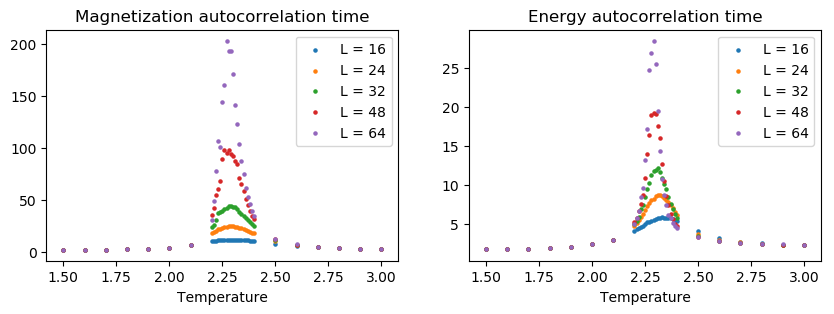

PyObject Text(0.5, 23.999999999999993, 'Temperature')

In [11]:
figure(figsize=(10,3))

subplot(1,2,1)
for Length=[16 24 32 48 64]
    data = readdlm(@sprintf("data/autocorrelation_time_L%d.txt",Length));
    scatter(data[:,1], data[:,2], 5)
end
legend(["L = 16", "L = 24", "L = 32", "L = 48", "L = 64"])
title("Magnetization autocorrelation time")
xlabel("Temperature")

subplot(1,2,2)
for Length=[16 24 32 48 64]
    data = readdlm(@sprintf("data/autocorrelation_time_L%d.txt",Length));
    scatter(data[:,1], data[:,3], 5)
end
legend(["L = 16", "L = 24", "L = 32", "L = 48", "L = 64"])
title("Energy autocorrelation time")

figure(figsize=(10,3))

subplot(1,2,1)xlabel("Temperature")

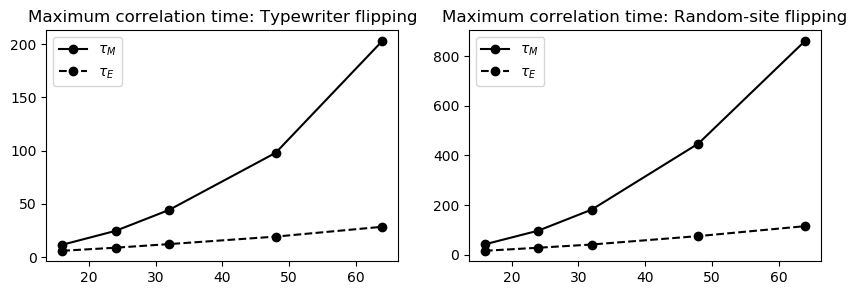

PyObject <matplotlib.legend.Legend object at 0x00000000325B01D0>

In [72]:
figure(figsize=(10,3))

subplot(1,2,1)
vec_Length = [16, 24, 32, 48, 64]
data_plot = zeros(length(vec_Length),2)
for index_Length = 1:length(vec_Length)
    Length = vec_Length[index_Length]
    data = readdlm(@sprintf("data/autocorrelation_time_L%d.txt",Length));
    data_plot[index_Length, :] = [maximum(data[:,2]) maximum(data[:,3])] 
end
plot(vec_Length, data_plot[:,1],"k-o")
plot(vec_Length, data_plot[:,2],"k--o")
title("Maximum correlation time: Typewriter flipping")
legend([L"$\tau_M$", L"$\tau_E$"])

subplot(1,2,2)
vec_Length = [16, 24, 32, 48, 64]
data_plot = zeros(length(vec_Length),2)
for index_Length = 1:length(vec_Length)
    Length = vec_Length[index_Length]
    data = readdlm(@sprintf("data/autocorrelation_time_rs_L%d.txt",Length));
    data_plot[index_Length, :] = [maximum(data[:,2]) maximum(data[:,3])] 
end
plot(vec_Length, data_plot[:,1],"k-o")
plot(vec_Length, data_plot[:,2],"k--o")
title("Maximum correlation time: Random-site flipping")
legend([L"$\tau_M$", L"$\tau_E$"])

# Physical properties

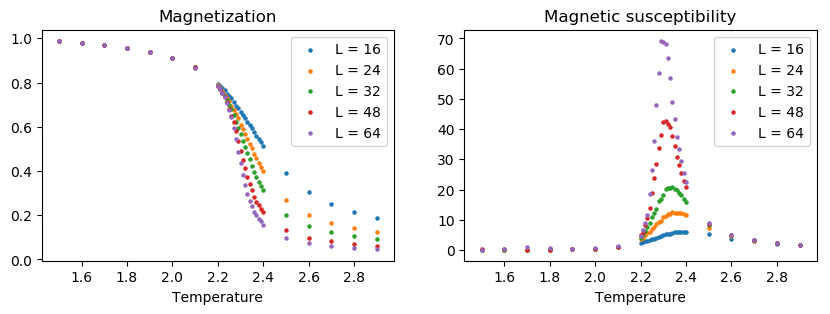

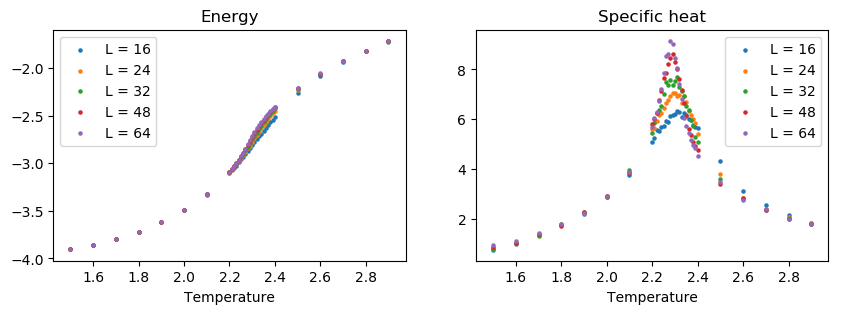

PyObject Text(0.5, 23.999999999999993, 'Temperature')

In [26]:
# data file structure: temperature, <m>, <m^2>, <e>, <e^2>

figure("Magnetic properties", figsize=(10,3))

subplot(1,2,1)
for Length=[16 24 32 48 64]
    data = readdlm(@sprintf("data/magnetization_L%d.txt",Length));
    scatter(data[:,1], data[:,2], 5)
end
legend(["L = 16", "L = 24", "L = 32", "L = 48", "L = 64"])
title("Magnetization")
xlabel("Temperature")

subplot(1,2,2)
for Length=[16 24 32 48 64]
    data = readdlm(@sprintf("data/magnetization_L%d.txt",Length));
    scatter(data[:,1], (data[:,3]-data[:,2].^2)./data[:,1].*Length^2, 5)
end
legend(["L = 16", "L = 24", "L = 32", "L = 48", "L = 64"])
title("Magnetic susceptibility")
xlabel("Temperature")

figure("Energetic properties",figsize=(10,3))

subplot(1,2,1)
for Length=[16 24 32 48 64]
    data = readdlm(@sprintf("data/magnetization_L%d.txt",Length));
    scatter(data[:,1], data[:,4], 5)
end
legend(["L = 16", "L = 24", "L = 32", "L = 48", "L = 64"])
title("Energy")
xlabel("Temperature")

subplot(1,2,2)
for Length=[16 24 32 48 64]
    data = readdlm(@sprintf("data/magnetization_L%d.txt",Length));
    scatter(data[:,1], (data[:,5]-data[:,4].^2)./data[:,1].^2.*Length^2, 5)
end
legend(["L = 16", "L = 24", "L = 32", "L = 48", "L = 64"])
title("Specific heat")
xlabel("Temperature")

# Finite-size scaling

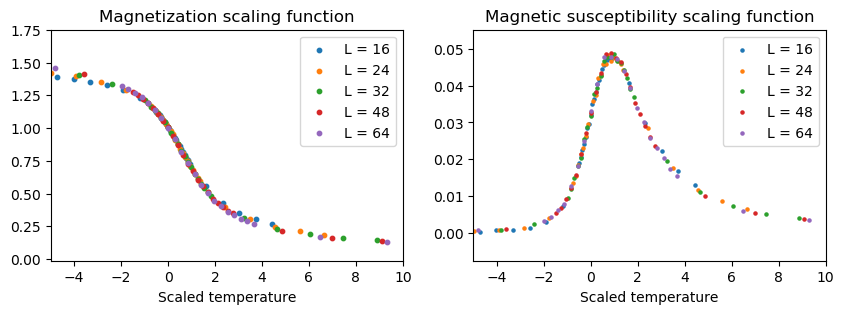

PyObject Text(0.5, 23.999999999999993, 'Scaled temperature')

In [39]:
figure("Magnetic properties: finite-size scaling", figsize=(10,3))

subplot(1,2,1)
ν = 1;
β = -0.125;
Tc = 2.27;
for Length=[16 24 32 48 64]
    data = readdlm(@sprintf("data/magnetization_L%d.txt",Length));
    scatter(((data[:,1].-Tc)./Tc).*Length^(1/ν), Length^(-β/ν) .* (data[:,2]), 10)
end
xlim([-5, 10])
legend(["L = 16", "L = 24", "L = 32", "L = 48", "L = 64"])
title("Magnetization scaling function")
xlabel("Scaled temperature")

subplot(1,2,2)
ν = 1;
γ = 1.75;
Tc = 2.27;
for Length=[16 24 32 48 64]
    data = readdlm(@sprintf("data/magnetization_L%d.txt",Length));
    scatter(((data[:,1].-Tc)./Tc).*Length^(1/ν), Length^(-γ/ν) .* (data[:,3]-data[:,2].^2)./data[:,1].*Length^2, 5)
end
xlim([-5, 10])
legend(["L = 16", "L = 24", "L = 32", "L = 48", "L = 64"])
title("Magnetic susceptibility scaling function")
xlabel("Scaled temperature")